# 🧠 End-to-End Machine Learning Classification Project

## 📌 Problem Statement
The goal of this project is to build a machine learning model that predicts ______ using structured data.

## 🎯 Objective
To compare multiple classification algorithms and select the best performing model based on evaluation metrics.

## LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 🔎 Exploratory Data Analysis
In this section, we analyze feature distributions, correlations, and class imbalance.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.shape

(1338, 7)

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [8]:
num_data=data._get_numeric_data()
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


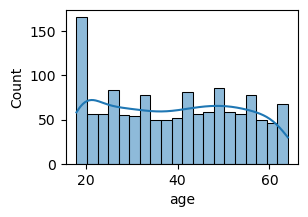

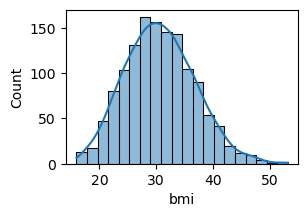

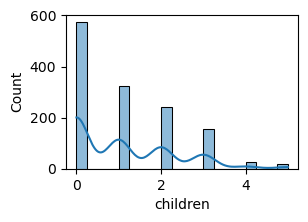

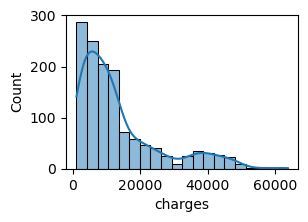

In [9]:
for col in num_data:
    plt.figure(figsize=(3,2))
    sns.histplot(data[col],kde=True,bins=20)
    plt.show()

<Figure size 300x200 with 0 Axes>

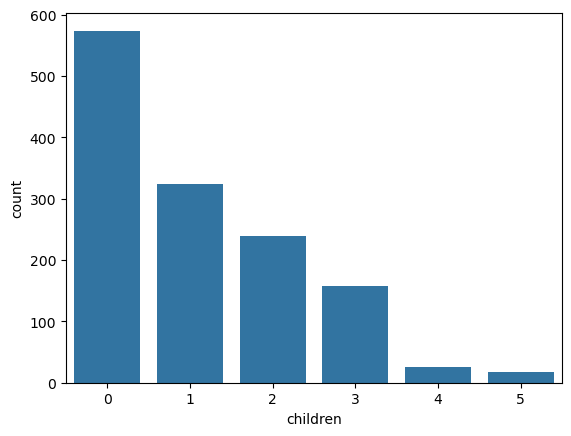

<Figure size 300x200 with 0 Axes>

In [10]:
sns.countplot(x=data['children'])
plt.figure(figsize=(3,2))

<Axes: xlabel='sex', ylabel='count'>

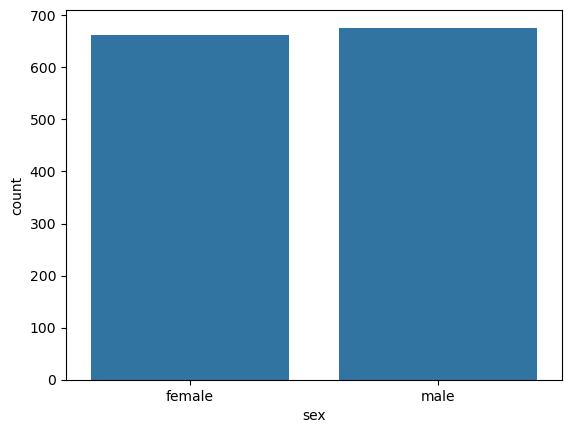

In [11]:
sns.countplot(x=data['sex'])

<Axes: xlabel='smoker', ylabel='count'>

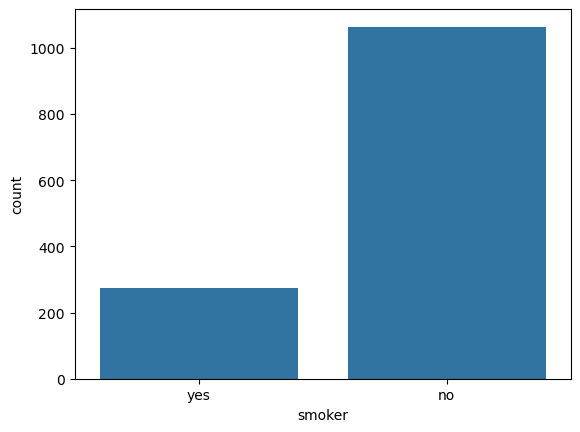

In [12]:
sns.countplot(x=data['smoker'])

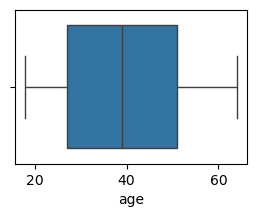

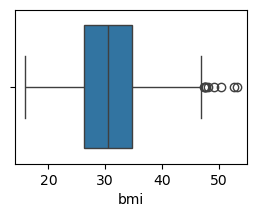

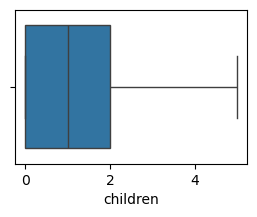

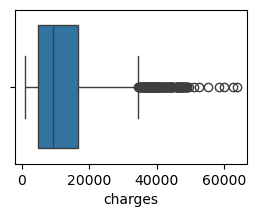

In [13]:
for col in num_data:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=data[col])

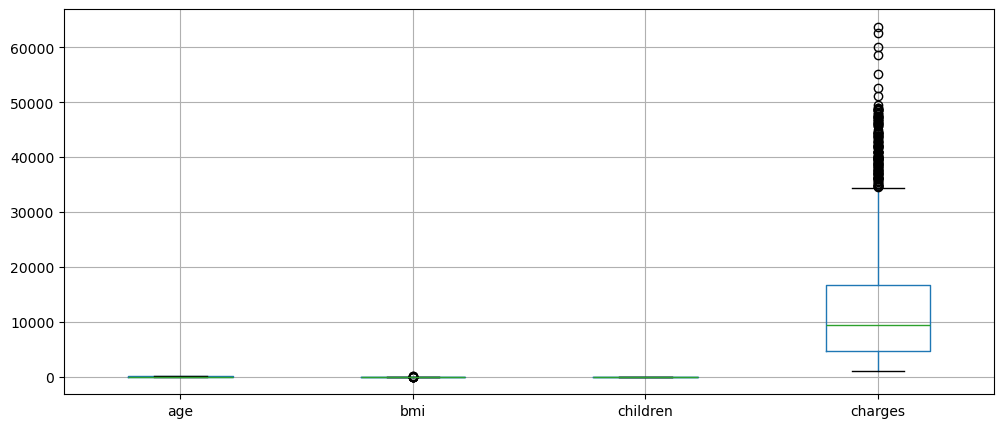

In [14]:
num_data.boxplot(figsize=(12,5))
plt.show()


In [15]:
num_data_corr=num_data.corr()
num_data_corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

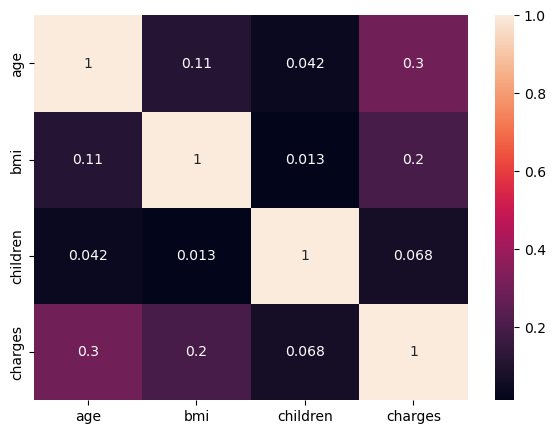

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(num_data_corr,annot=True)

## ⚙️ Data Preprocessing
- Handling missing values
- Encoding categorical variables
- Feature scaling
- Handling class imbalance using SMOTE

In [17]:
df_cleaned=data.copy()

In [18]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [19]:
df_cleaned.shape

(1338, 7)

In [20]:
df_cleaned.drop_duplicates(inplace=True)

In [21]:
 df_cleaned.shape

(1337, 7)

In [22]:
df_cleaned.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [24]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [25]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [26]:
df_cleaned['sex']=df_cleaned['sex'].map({'male':1,'female':0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [27]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'yes':1,'no':0})
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [28]:
'''from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cleaned['sex_encoded']=le.fit_transform(df_cleaned['sex'])
df_cleaned['smoker_encoded']=le.fit_transform(df_cleaned['smoker'])
df_cleaned.head()'''

"from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\ndf_cleaned['sex_encoded']=le.fit_transform(df_cleaned['sex'])\ndf_cleaned['smoker_encoded']=le.fit_transform(df_cleaned['smoker'])\ndf_cleaned.head()"

In [29]:
df_cleaned.rename(columns={
    'sex': 'is_male',
    'smoker': 'is_smoker'
}, inplace=True)
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [30]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [31]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)

In [32]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [33]:
df_cleaned=df_cleaned.astype(int)

In [34]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


In [35]:
df_cleaned.dtypes

age                 int64
is_male             int64
bmi                 int64
children            int64
is_smoker           int64
charges             int64
region_northwest    int64
region_southeast    int64
region_southwest    int64
dtype: object

## FEATURE ENGINEERING AND EXTRACTION 

<Axes: xlabel='bmi', ylabel='Count'>

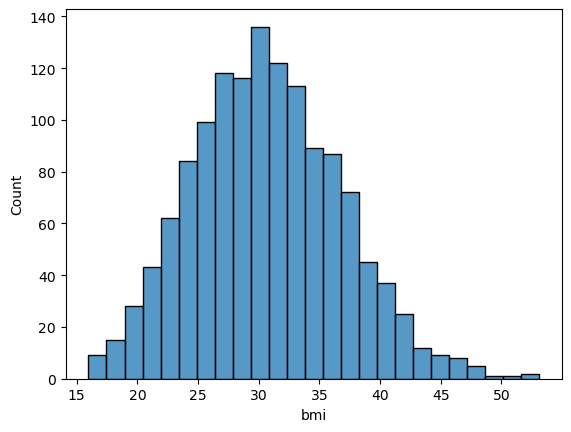

In [36]:
sns.histplot(data['bmi'])

In [37]:
df_cleaned['bmi_categorie']=pd.cut(
    df_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')],
    labels=['UnderWeight','Normal','OverWeight','Obesity']
)


In [38]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie
0,19,0,27,0,1,16884,0,0,1,OverWeight
1,18,1,33,1,0,1725,0,1,0,Obesity
2,28,1,33,3,0,4449,0,1,0,Obesity
3,33,1,22,0,0,21984,1,0,0,Normal
4,32,1,28,0,0,3866,1,0,0,OverWeight


In [39]:
df_cleaned.dtypes

age                    int64
is_male                int64
bmi                    int64
children               int64
is_smoker              int64
charges                int64
region_northwest       int64
region_southeast       int64
region_southwest       int64
bmi_categorie       category
dtype: object

In [40]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['bmi_categorie'],drop_first=True)

In [41]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity
0,19,0,27,0,1,16884,0,0,1,False,True,False
1,18,1,33,1,0,1725,0,1,0,False,False,True
2,28,1,33,3,0,4449,0,1,0,False,False,True
3,33,1,22,0,0,21984,1,0,0,True,False,False
4,32,1,28,0,0,3866,1,0,0,False,True,False


In [42]:
df_cleaned=df_cleaned.astype(int)

In [43]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity
0,19,0,27,0,1,16884,0,0,1,0,1,0
1,18,1,33,1,0,1725,0,1,0,0,0,1
2,28,1,33,3,0,4449,0,1,0,0,0,1
3,33,1,22,0,0,21984,1,0,0,1,0,0
4,32,1,28,0,0,3866,1,0,0,0,1,0


In [44]:
df_cleaned.dtypes

age                         int64
is_male                     int64
bmi                         int64
children                    int64
is_smoker                   int64
charges                     int64
region_northwest            int64
region_southeast            int64
region_southwest            int64
bmi_categorie_Normal        int64
bmi_categorie_OverWeight    int64
bmi_categorie_Obesity       int64
dtype: object

In [45]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       1337 non-null   int64
 1   is_male                   1337 non-null   int64
 2   bmi                       1337 non-null   int64
 3   children                  1337 non-null   int64
 4   is_smoker                 1337 non-null   int64
 5   charges                   1337 non-null   int64
 6   region_northwest          1337 non-null   int64
 7   region_southeast          1337 non-null   int64
 8   region_southwest          1337 non-null   int64
 9   bmi_categorie_Normal      1337 non-null   int64
 10  bmi_categorie_OverWeight  1337 non-null   int64
 11  bmi_categorie_Obesity     1337 non-null   int64
dtypes: int64(12)
memory usage: 135.8 KB


In [46]:
df_cleaned['age_category'] = pd.cut(
    df_cleaned['age'],
    bins=[0, 12, 19, 30, 50, float('inf')],
    labels=['Children', 'Teen', 'Youth', 'Middle Age', 'Old Age'],
    include_lowest=True
)

In [47]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity,age_category
0,19,0,27,0,1,16884,0,0,1,0,1,0,Teen
1,18,1,33,1,0,1725,0,1,0,0,0,1,Teen
2,28,1,33,3,0,4449,0,1,0,0,0,1,Youth
3,33,1,22,0,0,21984,1,0,0,1,0,0,Middle Age
4,32,1,28,0,0,3866,1,0,0,0,1,0,Middle Age


In [48]:
df_cleaned=pd.get_dummies(df_cleaned,columns=['age_category'],drop_first=True)

In [49]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity,age_category_Teen,age_category_Youth,age_category_Middle Age,age_category_Old Age
0,19,0,27,0,1,16884,0,0,1,0,1,0,True,False,False,False
1,18,1,33,1,0,1725,0,1,0,0,0,1,True,False,False,False
2,28,1,33,3,0,4449,0,1,0,0,0,1,False,True,False,False
3,33,1,22,0,0,21984,1,0,0,1,0,0,False,False,True,False
4,32,1,28,0,0,3866,1,0,0,0,1,0,False,False,True,False


In [50]:
df_cleaned.dtypes

age                         int64
is_male                     int64
bmi                         int64
children                    int64
is_smoker                   int64
charges                     int64
region_northwest            int64
region_southeast            int64
region_southwest            int64
bmi_categorie_Normal        int64
bmi_categorie_OverWeight    int64
bmi_categorie_Obesity       int64
age_category_Teen            bool
age_category_Youth           bool
age_category_Middle Age      bool
age_category_Old Age         bool
dtype: object

In [51]:
df_cleaned=df_cleaned.astype(int)

In [52]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity,age_category_Teen,age_category_Youth,age_category_Middle Age,age_category_Old Age
0,19,0,27,0,1,16884,0,0,1,0,1,0,1,0,0,0
1,18,1,33,1,0,1725,0,1,0,0,0,1,1,0,0,0
2,28,1,33,3,0,4449,0,1,0,0,0,1,0,1,0,0
3,33,1,22,0,0,21984,1,0,0,1,0,0,0,0,1,0
4,32,1,28,0,0,3866,1,0,0,0,1,0,0,0,1,0


In [53]:
df_cleaned.dtypes

age                         int64
is_male                     int64
bmi                         int64
children                    int64
is_smoker                   int64
charges                     int64
region_northwest            int64
region_southeast            int64
region_southwest            int64
bmi_categorie_Normal        int64
bmi_categorie_OverWeight    int64
bmi_categorie_Obesity       int64
age_category_Teen           int64
age_category_Youth          int64
age_category_Middle Age     int64
age_category_Old Age        int64
dtype: object

In [54]:
df_cleaned.columns

Index(['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categorie_Normal', 'bmi_categorie_OverWeight',
       'bmi_categorie_Obesity', 'age_category_Teen', 'age_category_Youth',
       'age_category_Middle Age', 'age_category_Old Age'],
      dtype='object')

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler=StandardScaler()
col=['age','bmi','children']
df_cleaned[col]=scaler.fit_transform(df_cleaned[col])


In [57]:
df_cleaned.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity,age_category_Teen,age_category_Youth,age_category_Middle Age,age_category_Old Age
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,1,0,0,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1,1,0,0,0
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1,0,1,0,0
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,0,0,1,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0,0,1,0


In [58]:
df_cleaned.columns

Index(['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categorie_Normal', 'bmi_categorie_OverWeight',
       'bmi_categorie_Obesity', 'age_category_Teen', 'age_category_Youth',
       'age_category_Middle Age', 'age_category_Old Age'],
      dtype='object')

In [59]:
from scipy.stats import pearsonr
selected_feature=['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categorie_Normal', 'bmi_categorie_OverWeight',
       'bmi_categorie_Obesity', 'age_category_Teen', 'age_category_Youth',
       'age_category_Middle Age', 'age_category_Old Age']

correlation={
    feature:pearsonr(df_cleaned[feature],df_cleaned['charges'])[0]
    for feature in selected_feature
}
correlation_df=pd.DataFrame(list(correlation.items()),columns=['selected_feature', 'pearsonr_corr'])
correlation_df=correlation_df.sort_values(by='pearsonr_corr', ascending=False)
correlation_df

,selected_feature,pearsonr_corr
5,charges,1.000000
4,is_smoker,0.787234
0,age,0.298309
15,age_category_Old Age,0.239148
11,bmi_categorie_Obesity,0.200348
2,bmi,0.196236
7,region_southeast,0.073577
3,children,0.067390
1,is_male,0.058046
14,age_category_Middle Age,0.000113


In [60]:
df_cleaned.columns

Index(['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categorie_Normal', 'bmi_categorie_OverWeight',
       'bmi_categorie_Obesity', 'age_category_Teen', 'age_category_Youth',
       'age_category_Middle Age', 'age_category_Old Age'],
      dtype='object')

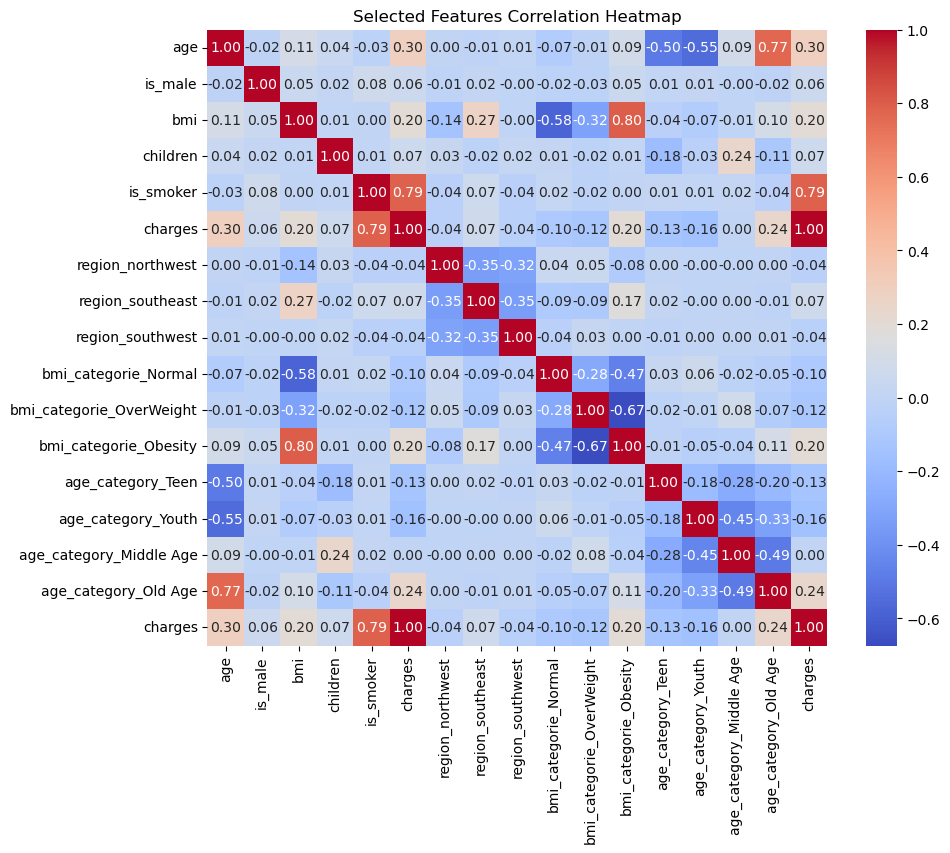

In [61]:
features = selected_feature + ['charges']
plt.figure(figsize=(10,8))
sns.heatmap(
    df_cleaned[features].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Selected Features Correlation Heatmap")
plt.show()


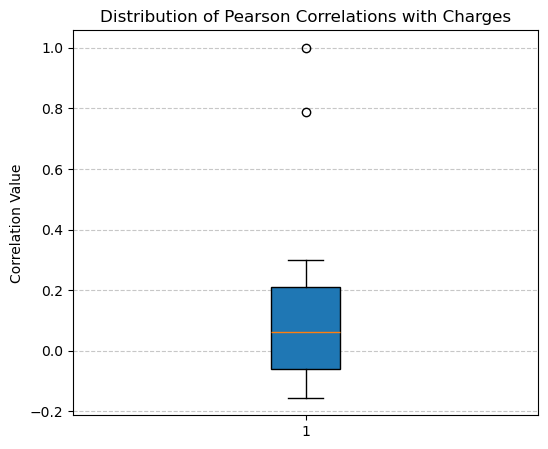

In [62]:
plt.figure(figsize=(6,5))
plt.boxplot(correlation_df['pearsonr_corr'],
            vert=True,
            patch_artist=True)
plt.title("Distribution of Pearson Correlations with Charges")
plt.ylabel("Correlation Value")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


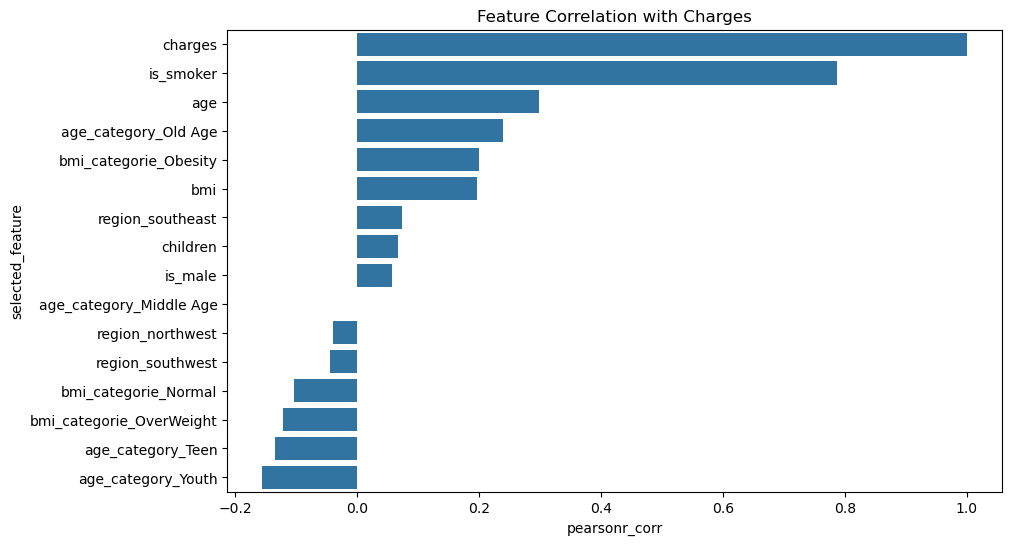

In [63]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='pearsonr_corr',
    y='selected_feature',
    data=correlation_df
)
plt.title("Feature Correlation with Charges")
plt.show()


<Axes: >

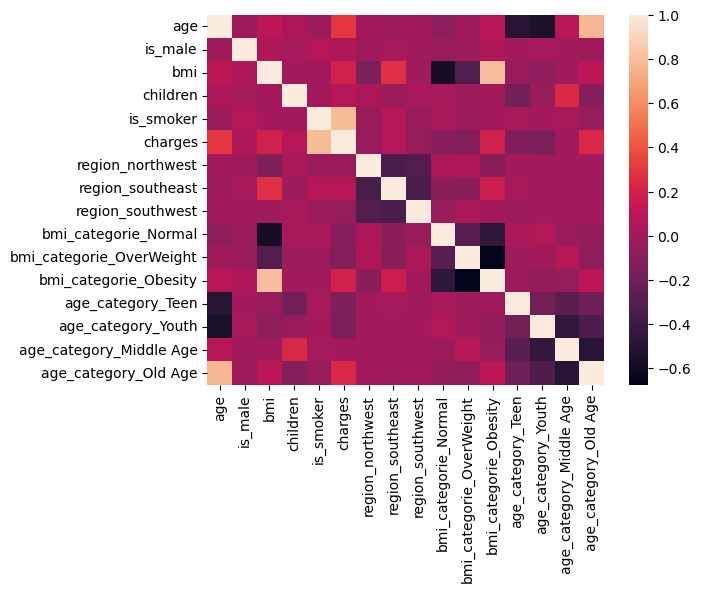

In [64]:
corr = df_cleaned.corr()
sns.heatmap(corr)

## 🤖 Model Building
We train and compare multiple classification models.

In [65]:
threshold = 0.2
important_features = corr[abs(corr) > threshold].index
print("Important Features:")
print(important_features)

Important Features:
Index(['age', 'is_male', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_categorie_Normal', 'bmi_categorie_OverWeight',
       'bmi_categorie_Obesity', 'age_category_Teen', 'age_category_Youth',
       'age_category_Middle Age', 'age_category_Old Age'],
      dtype='object')


In [66]:
final_df = df_cleaned[list(important_features)]
final_df.head()

,age,is_male,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_categorie_Normal,bmi_categorie_OverWeight,bmi_categorie_Obesity,age_category_Teen,age_category_Youth,age_category_Middle Age,age_category_Old Age
0,-1.440418,0,-0.517949,-0.909234,1,16884,0,0,1,0,1,0,1,0,0,0
1,-1.511647,1,0.462463,-0.079442,0,1725,0,1,0,0,0,1,1,0,0,0
2,-0.799350,1,0.462463,1.580143,0,4449,0,1,0,0,0,1,0,1,0,0
3,-0.443201,1,-1.334960,-0.909234,0,21984,1,0,0,1,0,0,0,0,1,0
4,-0.514431,1,-0.354547,-0.909234,0,3866,1,0,0,0,1,0,0,0,1,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X=final_df.drop('charges',axis=1)
y=final_df['charges']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 15), (268, 15), (1069,), (268,))

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [72]:
yhat_train=model.predict(X_train)

## MODEL EVALUATION

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
def eval_regression(y_train,yhat_train):
    mse=mean_squared_error(y_train,yhat_train)
    mae=mean_absolute_error(y_train,yhat_train)
    rmse=np.sqrt(mse)
    r_sq=r2_score(y_train,yhat_train)
    print('mean_Squared_Error:',mse)
    print("Mean Absolute Error (MAE):", mae)
    print('root_mean_Squared_Error:',rmse)
    print('r2_score:',r_sq)  

In [75]:
eval_regression(y_train,yhat_train)

mean_Squared_Error: 33951247.056538954
Mean Absolute Error (MAE): 4118.210168844428
root_mean_Squared_Error: 5826.769864731141
r2_score: 0.7697706022562019


In [76]:
yhat_test=model.predict(X_test)

In [77]:
def eval_regression(y_test,yhat_test):
    mse=mean_squared_error(y_test,yhat_test)
    mae=mean_absolute_error(y_test,yhat_test)
    rmse=np.sqrt(mse)
    r_sq=r2_score(y_test,yhat_test)
    print('mean_Squared_Error:',mse)
    print("Mean Absolute Error (MAE):", mae)
    print('root_mean_Squared_Error:',rmse)
    print('r2_score:',r_sq)  

In [78]:
eval_regression(y_test,yhat_test)

mean_Squared_Error: 41849585.95970945
Mean Absolute Error (MAE): 4503.209726835546
root_mean_Squared_Error: 6469.12559467734
r2_score: 0.7069637664079462


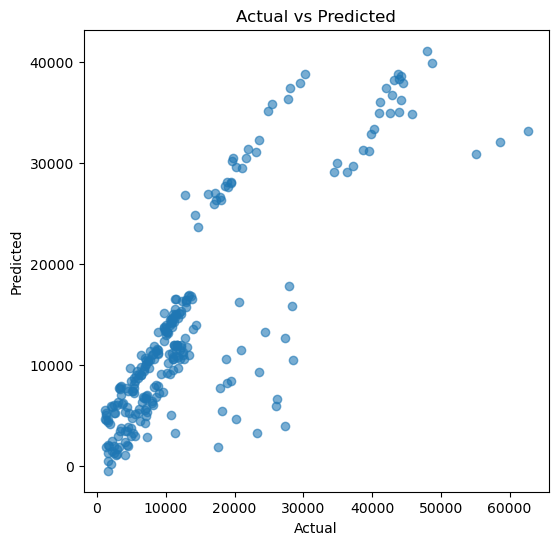

In [79]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat_test,alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

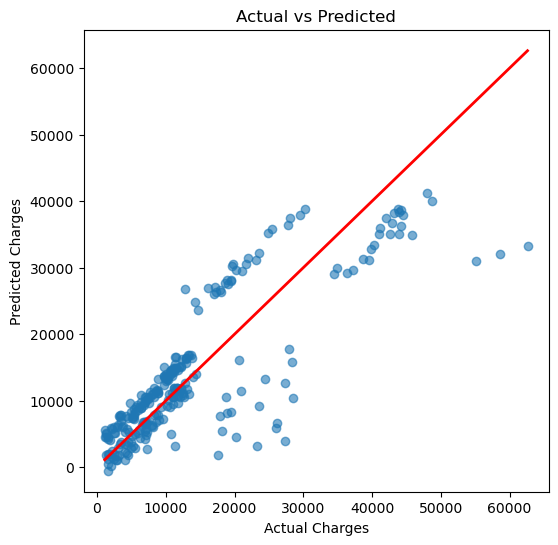

In [80]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat_test, alpha=0.6)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2
)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted")
plt.show()

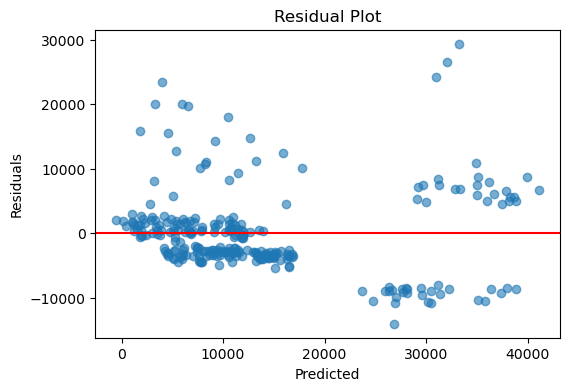

In [81]:
residuals = y_test - yhat_test

plt.figure(figsize=(6,4))
plt.scatter(yhat_test, residuals, alpha=0.6)
plt.axhline(0, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

## LINEAR REG

In [82]:
model.coef_

array([ 4214.23355492,  -130.14356543,   826.07848983,   789.2734669 ,
       24024.25638202,  -655.14250559, -1160.28248212, -1003.91434915,
       -1378.92621569,  -445.9433833 ,  1969.44747512,  1565.86749201,
         349.68428159, -1392.72322249,  -522.82855111])

In [83]:
model_params = pd.DataFrame(model.coef_, index=X.columns, columns=['LinearReg'])
model_params

,LinearReg
age,4214.233555
is_male,-130.143565
bmi,826.078490
children,789.273467
is_smoker,24024.256382
region_northwest,-655.142506
region_southeast,-1160.282482
region_southwest,-1003.914349
bmi_categorie_Normal,-1378.926216
bmi_categorie_OverWeight,-445.943383


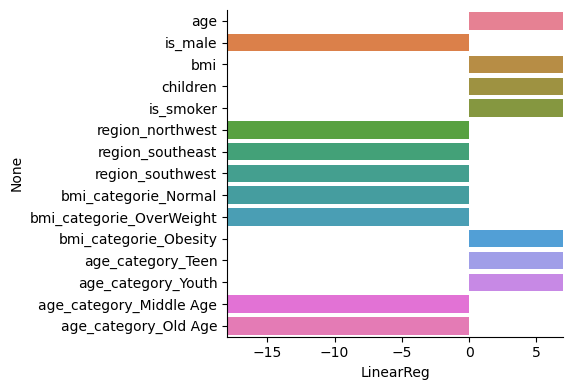

In [84]:
sns.catplot(model_params, x=model_params['LinearReg'], y=model_params.index,
            kind='bar',
            hue=model_params.index,
            height=4,
            aspect = 1.5
           )
plt.xlim(-18,7)
plt.show()

In [85]:
from sklearn.linear_model import Lasso, Ridge

## LASSO

In [86]:
lasso = Lasso(alpha=1.0)
lasso.fit(X,y)
lasso.coef_

array([ 3944.75918798,  -155.76635186,   879.79783503,   734.0381539 ,
       23869.48585962,  -382.30891798,  -849.74235598,  -951.06638875,
        -677.74114555,  -318.49061487,  2395.60783657,  1077.24132118,
         598.40178747,  -875.21446806,    -0.        ])

In [87]:
model_params['Lasso'] = lasso.coef_
model_params

,LinearReg,Lasso
age,4214.233555,3944.759188
is_male,-130.143565,-155.766352
bmi,826.078490,879.797835
children,789.273467,734.038154
is_smoker,24024.256382,23869.485860
region_northwest,-655.142506,-382.308918
region_southeast,-1160.282482,-849.742356
region_southwest,-1003.914349,-951.066389
bmi_categorie_Normal,-1378.926216,-677.741146
bmi_categorie_OverWeight,-445.943383,-318.490615


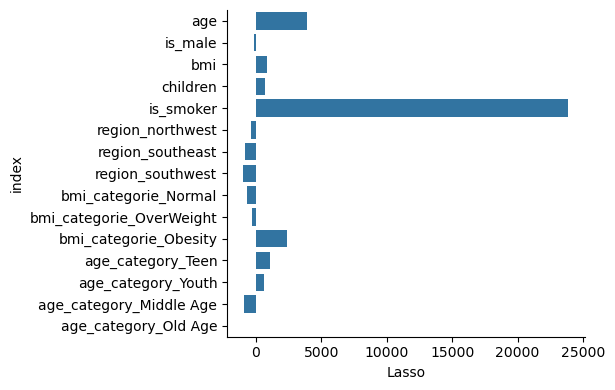

In [88]:
model_params = model_params.reset_index()
sns.catplot(
    data=model_params,
    x='Lasso',
    y='index',
    kind='bar',
    height=4,
    aspect=1.5
)
plt.show()

## RIDGE

In [89]:
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)

Ridge()

In [90]:
ridge.coef_

array([ 3947.39204096,  -152.77619404,   891.60808421,   734.82726456,
       23765.11806837,  -392.42456695,  -853.10695307,  -959.80339531,
        -751.93476975,  -405.43054464,  2294.95551531,   883.60400081,
         402.66339899, -1076.28590566,  -209.98149414])

In [91]:
model_params['Ridge'] = ridge.coef_
model_params

,index,LinearReg,Lasso,Ridge
0,age,4214.233555,3944.759188,3947.392041
1,is_male,-130.143565,-155.766352,-152.776194
2,bmi,826.078490,879.797835,891.608084
3,children,789.273467,734.038154,734.827265
4,is_smoker,24024.256382,23869.485860,23765.118068
5,region_northwest,-655.142506,-382.308918,-392.424567
6,region_southeast,-1160.282482,-849.742356,-853.106953
7,region_southwest,-1003.914349,-951.066389,-959.803395
8,bmi_categorie_Normal,-1378.926216,-677.741146,-751.934770
9,bmi_categorie_OverWeight,-445.943383,-318.490615,-405.430545


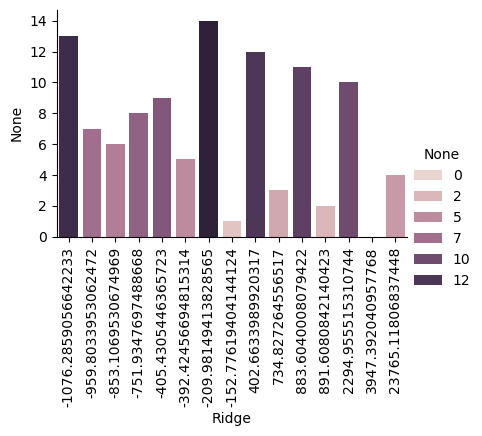

In [92]:
sns.catplot(model_params, x=model_params['Ridge'], y=model_params.index,
            kind='bar',
            hue=model_params.index,
            height=3,
            aspect = 1.5
)
plt.xticks(rotation=90)
plt.show()

### RANDOM FOREST

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_model=RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [95]:
yhat_train=rf_model.predict(X_train)
eval_regression(y_train,yhat_train)

mean_Squared_Error: 3079414.319925164
Mean Absolute Error (MAE): 220.24134705332085
root_mean_Squared_Error: 1754.8260084478927
r2_score: 0.979117948065373


In [96]:
yhat_test=rf_model.predict(X_test)
eval_regression(y_test,yhat_test)

mean_Squared_Error: 63308105.3880597
Mean Absolute Error (MAE): 4175.835820895522
root_mean_Squared_Error: 7956.639076146391
r2_score: 0.5567084277338782


In [99]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)
feature_importance

,Feature,Importance
2,bmi,0.210982
0,age,0.182668
3,children,0.135329
1,is_male,0.074647
4,is_smoker,0.062014
6,region_southeast,0.054253
7,region_southwest,0.049578
5,region_northwest,0.047479
9,bmi_categorie_OverWeight,0.033245
10,bmi_categorie_Obesity,0.032633
